In [9]:
import pandas as pd
import numpy as np

In [2]:
from CarlaBEV.src.planning.planner import Planner

In [3]:
def append_to_scene(scene_id, actor, class_id):
    scene = []
    start, goal = actor
    scene.append([scene_id, class_id, start, goal, None, None])
    return scene

def compute_routes(scene_df):
    for idx, row in scene_df.iterrows():
        id = 0
        _, class_id, start, goal, _, _ = row
        if class_id == "pedestrians":
            id = 1
        planner = Planner(id)
        rx, ry = planner.find_global_path(start, goal, 1024)
        scene_df.astype({'rx': "object", 'ry': "object"}).dtypes
        scene_df.loc[idx, "rx"] = rx
        scene_df.loc[idx, "ry"] = ry
    return scene_df

def get_scene_df(scene_id, actors_dict):
    scene = []
    cols = ["scene_id", "class", "start", "goal", "rx", "ry"]
    for class_id in actors_dict.keys(): 
        for actors in actors_dict[class_id]:
            scene.extend(append_to_scene(scene_id, actors, class_id))

    scene_df = pd.DataFrame(scene, columns=cols)
    scene_df = compute_routes(scene_df)
    scene_df.to_csv(f"../assets/scenes/{scene_id}.csv")
    return scene_df

In [19]:
scene_id = "scene_1-1"

pedestrians = [
	[(8625, 4500), (8625, 1500)],
	[(8630, 2900), (8630, 1500)],
	[(8770, 6500), (8770, 1800)],
	[(8770, 1800), (8770, 6500)],
]

vehicles = [
	[(8730, 1800), (8730, 6500)],
	[(8730, 2300), (8730, 6500)],
	[(8650, 6500), (8650, 1500)],
	[(8650, 2900), (8650, 1500)],
]

agent = [[(8600, 1600), (8704, 6650)]]

scene_dict_11 = {
    "agent": agent,
	"pedestrians": pedestrians,
	"vehicles": vehicles
}

scene_df_11 = get_scene_df(scene_id, scene_dict_11)

In [13]:
scene_id = "scene_1-2"

pedestrians = [
    [(8625, 4500), (8625, 1500)],
    [(8630, 2900), (8630, 1500)],
    [(8770, 6500), (8770, 1800)],
]

vehicles = [
    [(8730, 2300), (8730, 6500)],
    [(8650, 6500), (8650, 1500)],
]

agent = [[(8600, 1600), (8704, 6650)]]

scene_dict_12 = {
    "agent": agent,
	"pedestrians": pedestrians,
	"vehicles": vehicles
}

scene_df_12 = get_scene_df(scene_id, scene_dict_12)

In [14]:
scene_id = "scene_1-3"
pedestrians = [
    [(8630, 2900), (8630, 1500)],
    [(8770, 1800), (8770, 6500)],
]


vehicles = [
    [(8730, 1800), (8730, 6500)],
    [(8730, 2300), (8730, 6500)],
]

agent = [[(8600, 1600), (8704, 6650)]]

scene_dict_13 = {
    "agent": agent,
	"pedestrians": pedestrians,
	"vehicles": vehicles
}

scene_df_13 = get_scene_df(scene_id, scene_dict_13)

In [ ]:
scene_id = "scene_1-0"

pedestrians = [
]

vehicles = [
]

agent = [[(8720, 1600), (8720, 6700)]]

scene_dict_10 = {
    "agent": agent,
	"pedestrians": pedestrians,
	"vehicles": vehicles
}

scene_df_10 = get_scene_df(scene_id, scene_dict_10)

# LOAD SCENES

In [4]:
from CarlaBEV.src.scenes import SceneBuilder

In [6]:
scene_builder = SceneBuilder(["scene_1-0", "scene_1-1", "scene_1-2", "scene_1-3"], 128)
actors = scene_builder.get_scene_actors("scene_1-0")

# PLOT SCENES

In [92]:
# Output in high quality.
%config InlineBackend.figure_format='retina'
%matplotlib tk
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (8, 6)

In [1]:
def plot_route_on_map(rgbmap, merged_path_coords):
    """
    Plots the route on top of the map.
    """
    plt.figure(figsize=(10, 10))
    plt.imshow(rgbmap)
    
    # Draw route
    if merged_path_coords.shape[0] > 1:
        plt.plot(merged_path_coords[:, 1], merged_path_coords[:, 0], 'r-', linewidth=3, label='Route')
        plt.scatter(merged_path_coords[0, 1], merged_path_coords[0, 0], c='green', s=100, label='Start')
        plt.scatter(merged_path_coords[-1, 1], merged_path_coords[-1, 0], c='red', s=100, label='End')

    plt.title("Shortest Path on Lane: Merged Route")
    plt.legend()
    plt.axis('off')
    plt.show()


In [7]:
from CarlaBEV.envs.utils import load_planning_map, load_map

map = load_planning_map()
rgbmap, _ = load_map(size=1024)

print(f"Image Size: {map.shape}")
print(f"Image Size: {rgbmap.shape}")

Image Size: (1280, 1024)
Image Size: (10240, 8192, 3)


In [10]:
def get_white_pixel_coords(rgbmap):
    # Find all white pixels (roads)
    white = np.all(rgbmap == [255, 255, 255], axis=-1)
    coords = np.argwhere(white)
    return coords

coords = get_white_pixel_coords(rgbmap)

In [8]:
# SCENE
scene_id = "scene_1-0"

pedestrians = [
]

vehicles = [
]

agent = [[(8720, 1600), (8720, 6700)]]

scene_dict_10 = {
    "agent": agent,
	"pedestrians": pedestrians,
	"vehicles": vehicles
}


In [86]:
intersections = [
    (8650, 1550),
    (8650, 6750),
    (7250, 1550),
    (7250, 2450),
    (7250, 3650),
    (7250, 4700),
    (7250, 6750),
    (6200, 1550),
    (6200, 2450),
    (3350, 1550),
    (3350, 2450),
    (3350, 3650),
    (3350, 4700),
    (3350, 6750),
    (2450, 1550),
    (2450, 6750),
]

In [87]:
plt.imshow(rgbmap)
for p in intersections:
    plt.scatter(p[1], p[0], c='k', s=2)
plt.draw()

In [ ]:
agent_routes = [
    [(8770, 1600), (8720, 6700)],
    [(3332, 6516), (3267, 4200)],
    [(3465, 6782), (3696, 4657)],
    [(4121, 2453), (2340, 2222)],

    [(5149, 1588), (3285, 1748)],
    [(6636, 3675), (6225, 2289)],
    [(7253, 3281), (7304, 2150)],
    [(3403, 6854), (2386, 5814)],
    [(8657, 2082), (7208, 2084)],
    [(8763, 1811), (7687, 1551)],
    [(6155, 1978), (7226, 2555)],
]

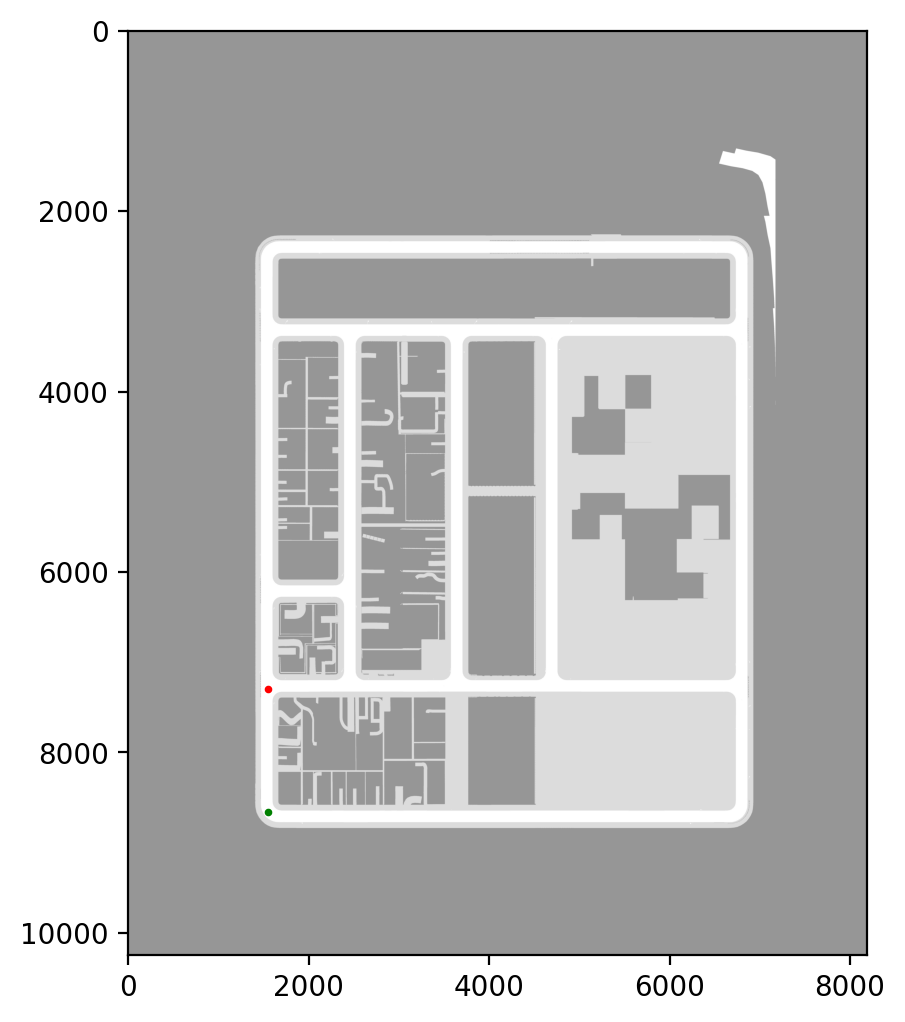

In [76]:
plot_scene(rgbmap, [intersections[0], (7300 ,1550)])

[(2378, 5429), (2588, 7166)]


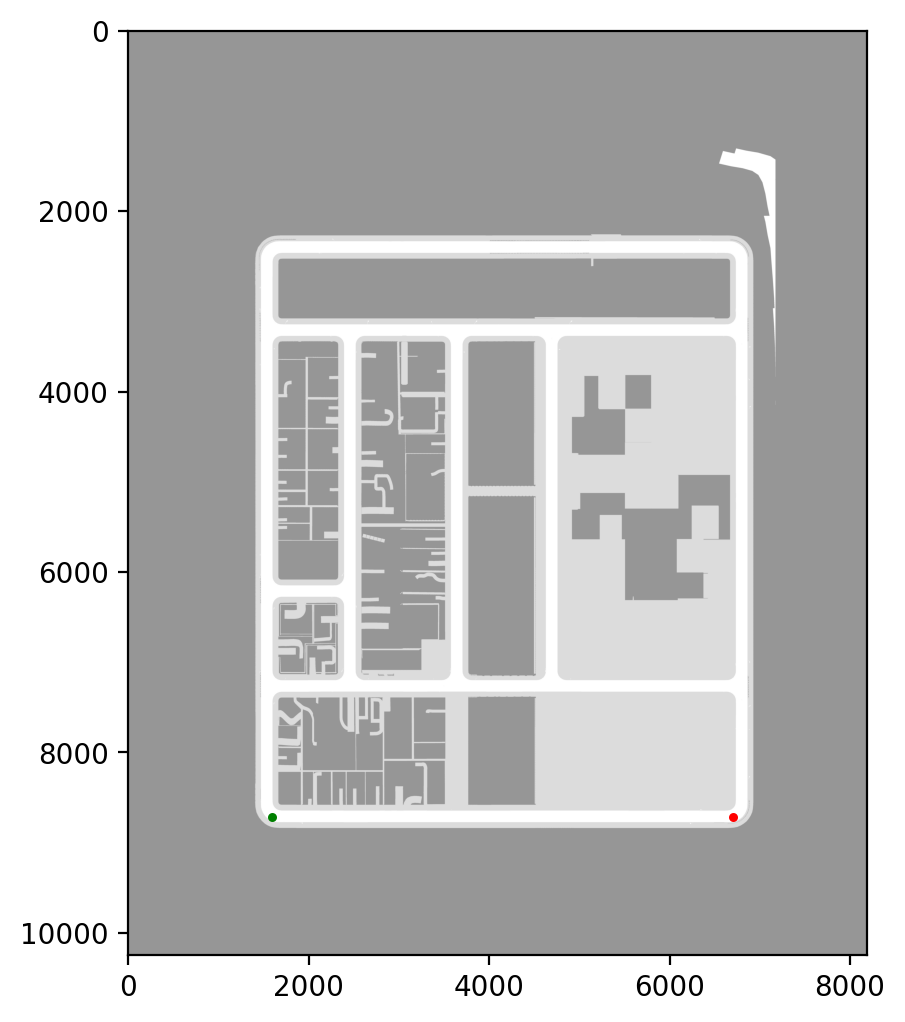

In [57]:
# Example usage:
random_route = generate_random_routes_within_distance(coords, min_distance=1000, max_distance=1800)
print(random_route)
n_route = 0
plot_scene(rgbmap, agent_routes[n_route])

In [90]:


agent = agent_routes[0]
plot_scene(rgbmap, agent)

In [15]:
rx, ry = actors['agent']
x0, y0 = rx[0], ry[0] 

In [ ]:
from CarlaBEV.src.planning.map_graph import MapGraph
map_graph = MapGraph(graph_path='planning_graph.pkl')

In [ ]:
# Find a route in the center lane within 2000 pixels
original_path, merged_path = map_graph.find_route(
    lane_type='left',
    max_distance=2000,
    merge_threshold=5
)

plot_route_on_map(merged_path)